https://wcs.robogarden.ca/app/index/html/course/activity/817/mission/3142/102/842/true/no-steps?submodule_id=475&module_id=738

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Download the Dataset
Download the fataset from the following link: https://www.kaggle.com/moltean/fruits

# Reading the Dataset

Read and prepare your dataset.

Divide your dataset into training and testing sets:
- 70% training set.
- 30% testing set.

# Determine how the images require preprocessing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)



# Initialize the training and test sets, and resize them to a standard size

In [ ]:
training_set = train_datagen.flow_from_directory('C:/Datasets/fruits/fruits-360_dataset_100x100/fruits-360/Training', 
                                                 target_size=(100,100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 6231 images belonging to 24 classes.


In [ ]:
# Locate and assign Test Set
test_set = test_datagen.flow_from_directory('C:/Datasets/fruits/fruits-360_dataset_100x100/fruits-360/Test', 
                                                 target_size=(100,100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = False)

Found 3110 images belonging to 24 classes.


# Define Your Convolutional Neural Network

Define a CNN with the following layers:
- The input layer is a 2-D convolutional layer with the following parameters:
- 16 units;
- Convolution window size: 2x2
- Activation function: ReLU
- Input shape: 100x100x3

Define a 2D max pooling layer with pool size of 2x2.

Define a 2D convolutional layer with the following parameters:
- 32 units;
- Convolution window size: 2x2
- Activation function: ReLU
- A 2-D max pooling layer with pool size of 2x2

Define two 2-D convolutional layers, each with the following parameters:
- 64 units;
- Convolution window size: 2x2
- Activation function: ReLU
- A 2D max pooling layer with pool size of 2x2
- A dropout layer with 0.3 rate
- A flattening layer

Define a fully-connected layer with:
- 150 units
- Activation function: ReLU
- A Dropout layer with a 0.4 rate

The output layer is a fully connected layer with:
- 81 units
- Activation function: softmax

In [5]:
# Initialize the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (2,2), input_shape = (100, 100, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size= (2,2)))

# Adding a second 2D convolution layer
classifier.add(Conv2D(32, (2,2), activation='relu'))

# Add a max pooling layer
classifier.add(MaxPooling2D(pool_size= (2, 2)))

# Add 2 more 2D convolution layers
classifier.add(Conv2D(64, (2,2), activation='relu'))
classifier.add(Conv2D(64, (2,2), activation='relu'))

# Add max pooling layer
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Dropout layer
classifier.add(Dropout(0.3))

# Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 150, activation='relu'))

# Dropout layer
classifier.add(Dropout(0.4))

# Output layer
classifier.add(Dense(units = 131, activation='softmax'))



c:\Users\jcollins\.conda\envs\wcs_python_310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Choosing Hyperparameters

Build the network using the following parameters:
- Optimizer: rmsprop
- Loss function: categorical_crossentropy
- Metrics: accuracy
- Batch size: 32
- Epochs: 30

In [6]:
# Compiling the CNN
classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

# Training Network
Use Keras to implement the network described and train your data.

Classification metrics:
- Print the accuracy measure on the testing data.
- Print the confusion matrix of the testing data.

In [7]:
# cnn = classifier.fit_generator(generator= training_set, steps_per_epoch = 1000, epochs = 30, validation_data = test_set, validation_steps = 100)

classifier.fit(training_set, steps_per_epoch = 1000, epochs = 30, validation_data = test_set, validation_steps = 100)

c:\Users\jcollins\.conda\envs\wcs_python_310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 24), output.shape=(None, 131)

# Classification Metrics
Print the Accuracy measure on the testing data

In [29]:
cnn.history

NameError: name 'cnn' is not defined

In [ ]:
plt.plot(cnn.history["accuracy"], color="r", label="accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

# Print confusion matrix of testing data

In [35]:
test_labels = test_set.labels

In [36]:
predictions = classifier.predict(test_set)


c:\Users\jcollins\.conda\envs\wcs_python_310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step


In [37]:
import numpy as np
predict_labels = np.argmax(predictions, axis=1)


In [38]:
# Use a print array to plot a Confusion Matrix
from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold = np.inf)

print("Confusion Matrix: \n", confusion_matrix(test_labels, predict_labels))

Confusion Matrix: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   5   0   0   0 310   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0
    0   0   0  19   0   0   0 294   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 318   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   3   0   0   0 243   0   4   0  57   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0 158   0   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  23   0   0   0  77   0   0   0 216   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0
    0   0   0  71   0   0   0  21   0   0   1 224   0   0   0]
 [  0   0   0   0   0

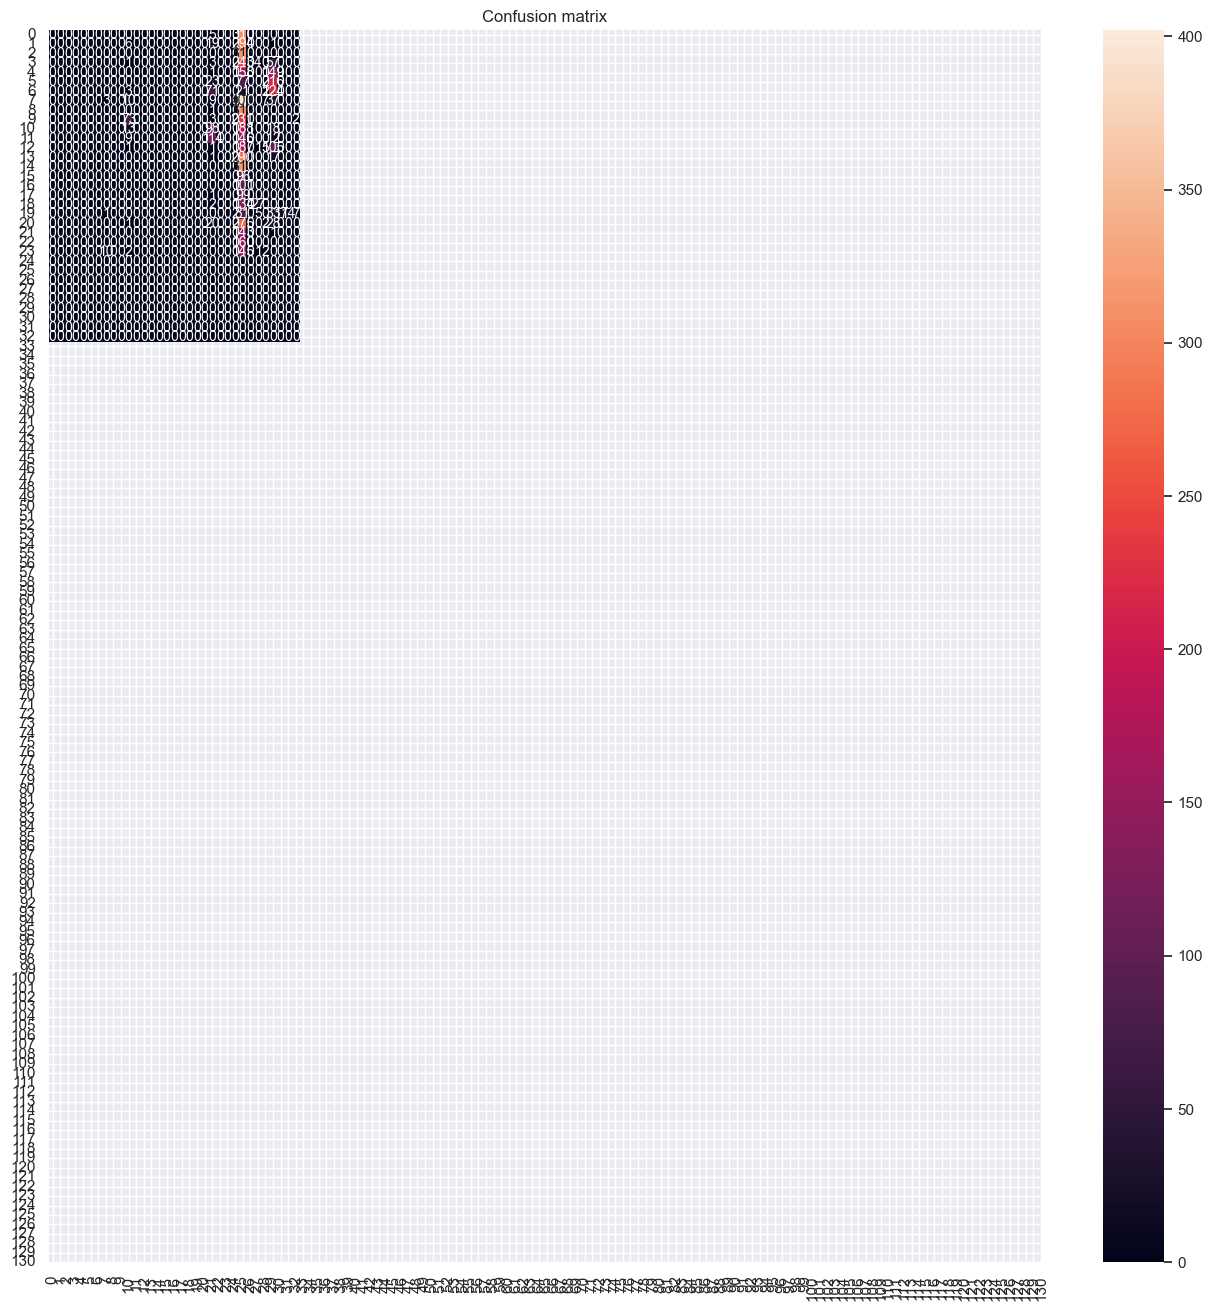

In [40]:
# Use a heatmap to plot the confusion matrix

import seaborn as sns

sns.set(font_scale = 1.0)
plt.figure(figsize = (16, 16))

CM = confusion_matrix(test_labels, predict_labels)
ax = plt.axes()

sns.heatmap(CM, annot=True,
            annot_kws={"size": 10},
            fmt="d",
            xticklabels=range(0,131),
            yticklabels=range(0,131),
            ax = ax)
ax.set_title("Confusion matrix")

plt.show()